#**Thông tin nhóm**
##Mã nhóm: 20CQ.PTDL.05
##Danh sách thành viên:
*   20120466 - Trần Thị Thu Hà
*   20120592 - Lê Minh Tiến
*   20120595 - Phạm Minh Tiến
*   20120624 - Mai Quyết Vang



#Thêm thư viện cần thiết

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Load dữ liệu

In [105]:
link_p1 = "https://raw.githubusercontent.com/Vanniee007/ADA-Final-Project-20CQ.PTDL.05/main/data/Data_Train_p1.xlsx"
link_p2 = "https://raw.githubusercontent.com/Vanniee007/ADA-Final-Project-20CQ.PTDL.05/main/data/Data_Train_p2.xlsx"


In [106]:
# Đọc dữ liệu từ file Excel
Data_Train_p1 = pd.read_excel(link_p1)
Data_Train_p2 = pd.read_excel(link_p2)

# Ghép nối hai DataFrame
merged_data = pd.concat([Data_Train_p1, Data_Train_p2], ignore_index=True)


#Quan sát và phân tích tập dữ liệu (EDA)


##1. Cho biết kiểu dữ liệu của các thuộc tính


In [107]:
# Hiển thị thông tin về DataFrame
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10684 entries, 0 to 10683
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10684 non-null  object
 1   Date_of_Journey  10684 non-null  object
 2   Source           10684 non-null  object
 3   Destination      10684 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10684 non-null  object
 6   Arrival_Time     10684 non-null  object
 7   Duration         10684 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10684 non-null  object
 10  Price            10684 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.3+ KB


##2. Đối với cột Price, cho biết:


*   Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
*   Độ lệch chuẩn của cột price?
*   Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm?
Nhận xét về giá trị mean và median của tập dữ liệu.
*   Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?
List item





Giá cao nhất: 79512
Giá thấp nhất: 1759
Giá trung bình: 9087.545582178958
Mức giá xuất hiện nhiều nhất: 10262
Số lần xuất hiện của mức giá: 258
Độ lệch chuẩn của cột Price: 4611.411872913706
Mean: 9087.545582178958, Median: 8372.0
Giá trị mean lớn hơn median, dữ liệu lệch về bên phải.


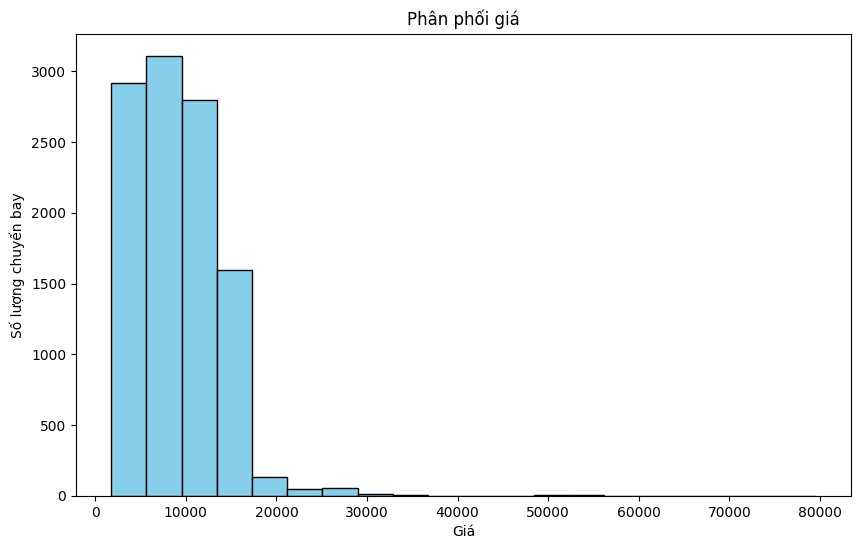

In [108]:
# 1. Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
max_price = merged_data['Price'].max()
min_price = merged_data['Price'].min()
mean_price = merged_data['Price'].mean()
# Đếm số lần xuất hiện của từng giá trị
price_counts = merged_data['Price'].value_counts()
# Lấy giá trị mode (xuất hiện nhiều nhất)
mode_price = price_counts.idxmax()
# Số lần xuất hiện của giá trị mode
mode_count = price_counts.max()


print(f"Giá cao nhất: {max_price}")
print(f"Giá thấp nhất: {min_price}")
print(f"Giá trung bình: {mean_price}")
print(f"Mức giá xuất hiện nhiều nhất: {mode_price}")
print(f"Số lần xuất hiện của mức giá: {mode_count}")

# 2. Độ lệch chuẩn của cột Price
std_price = merged_data['Price'].std()
print(f"Độ lệch chuẩn của cột Price: {std_price}")

# 3. Nhận xét về giá trị mean và median của tập dữ liệu
median_price = merged_data['Price'].median()
print(f"Mean: {mean_price}, Median: {median_price}")
if mean_price > median_price:
    print("Giá trị mean lớn hơn median, dữ liệu lệch về bên phải.")
elif mean_price < median_price:
    print("Giá trị mean nhỏ hơn median, dữ liệu lệch về bên trái.")
else:
    print("Giá trị mean bằng median, phân phối đối xứng.")

# 4. Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Phân phối giá')
plt.xlabel('Giá')
plt.ylabel('Số lượng chuyến bay')
plt.show()

##3. Mô tả số lượng missing value của mỗi thuộc tính


In [109]:
# 3. Mô tả số lượng missing value của mỗi thuộc tính
missing_values = merged_data.isnull().sum()
print("Số lượng missing value của mỗi thuộc tính:")
print(missing_values)

Số lượng missing value của mỗi thuộc tính:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


##4. Tính tỷ lệ % missing value của mỗi thuộc tính


In [110]:
# 4. Tính tỷ lệ % missing value của mỗi thuộc tính
missing_percentage = (missing_values / len(merged_data)) * 100
print("Tỷ lệ % missing value của mỗi thuộc tính:")
print(missing_percentage)

Tỷ lệ % missing value của mỗi thuộc tính:
Airline            0.00000
Date_of_Journey    0.00000
Source             0.00000
Destination        0.00000
Route              0.00936
Dep_Time           0.00000
Arrival_Time       0.00000
Duration           0.00000
Total_Stops        0.00936
Additional_Info    0.00000
Price              0.00000
dtype: float64


##5. Xử lý dữ liệu missing


In [111]:
# 5. Xử lý dữ liệu missing ( xóa các dòng có missing value)
merged_data.dropna(subset=['Total_Stops'], inplace=True)

##6. Outlier: sử dụng đồ thị boxplot để quan sát cột Price có tồn tại outlier không?

### Đồ thị

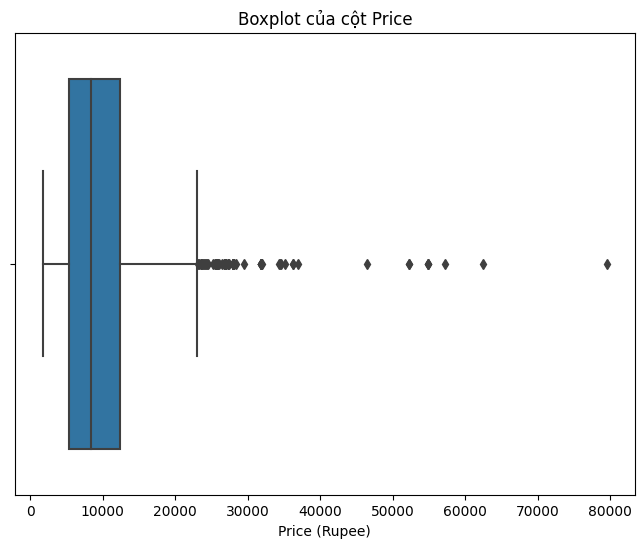

In [112]:
# Vẽ boxplot cho cột Price trong merged_data
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_data['Price'])
plt.title('Boxplot của cột Price')
plt.xlabel('Price (Rupee)')  # Thêm đơn vị cho trục x
plt.show()

### Các giá trị outlier: các giá trị outlier là có tồn tại, tuy nhiên có các chuyến bay giá cao như vậy là do thời gian bay dài, hạng vé business/premium




In [113]:
# Xác định giá trị Q1, Q3 và IQR
Q1 = merged_data['Price'].quantile(0.25)
Q3 = merged_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng cho outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc ra các dòng có giá trị 'Price' là outlier
outliers = merged_data[(merged_data['Price'] < lower_bound) | (merged_data['Price'] > upper_bound)]

# Hiển thị các dòng có giá 'Price' là outlier
print("Các dòng có giá 'Price' là outlier:")
outliers

Các dòng có giá 'Price' là outlier:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
627,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,07:40 02 Mar,14h 45m,1 stop,1 Long layover,26890
688,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,10:25 02 Mar,17h 30m,1 stop,1 Long layover,25735
750,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
...,...,...,...,...,...,...,...,...,...,...,...
10180,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,11:40,18:25,6h 45m,1 stop,No info,26890
10313,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,08:15 02 Mar,15h 20m,1 stop,No info,26890
10450,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → BHO → DEL,08:50,09:25 02 Mar,24h 35m,2 stops,No info,25430
10494,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,19:10,5h 5m,1 stop,No info,36235


## Preprocessing

### Chuyển Duration thành phút (int)


In [114]:
# Chuyển đổi cột 'Duration' về đơn vị phút
def convert_duration(duration):
    if 'h' in duration and 'm' in duration:
        return int(duration.split('h')[0]) * 60 + int(duration.split('h')[1].split('m')[0])
    elif 'h' in duration:
        return int(duration.split('h')[0]) * 60
    elif 'm' in duration:
        return int(duration.split('m')[0])
    else:
        return 0

merged_data['Duration'] = merged_data['Duration'].apply(convert_duration)


### Chuyển Total_stop thành kiểu int

In [115]:
# Chuyển Total_Stops về kiểu int
merged_data['Total_Stops'] = merged_data['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}).astype(int)

### Tính lại Arrival_Time, do có một vài Arrival_Time chưa chính xác, vì Arrival_Time phải bằng Dep_Time+ Duration (và còn phụ thuộc vào Date of Journey), nên tính lại Arrival_Time dựa vào 3 cột đó

In [116]:
# Chuyển đổi kiểu dữ liệu của cột 'Date_of_Journey'
merged_data['Date_of_Journey'] = pd.to_datetime(merged_data['Date_of_Journey'], format='%d/%m/%Y')

# Chuyển đổi cột 'Dep_Time' thành kiểu datetime chỉ chứa giờ và phút
merged_data['Dep_Time'] = pd.to_datetime(merged_data['Dep_Time'], format='%H:%M').dt.time


# Kiểm tra và chuyển đổi giá trị trong cột 'Duration'
merged_data['Duration'] = merged_data['Duration'].apply(lambda x: int(x.split('h')[0]) * 60 + int(x.split(' ')[-1][0]) if isinstance(x, str) else x)

# Tính cột 'Arrival_Time' dựa trên 'Date_of_Journey', 'Dep_Time', và 'Duration'
merged_data['Arrival_Time'] = merged_data.apply(lambda row: datetime.combine(row['Date_of_Journey'].date(), row['Dep_Time']) + timedelta(minutes=row['Duration']), axis=1)

# Chuyển đổi kiểu dữ liệu của cột 'Arrival_Time' thành kiểu datetime
merged_data['Arrival_Time'] = pd.to_datetime(merged_data['Arrival_Time'])

# Tách thành cột 'Arrival_Hour' (chỉ chứa giờ:phút:giây) và 'Arrival_Date' (chứa ngày-tháng-năm)
merged_data['Arrival_Time_new'] = merged_data['Arrival_Time'].dt.time
merged_data['Arrival_Date'] = merged_data['Arrival_Time'].dt.date

# Thêm cột 'Month_of_Journey' là tháng từ 'Date_of_Journey'
merged_data['Month_of_Journey'] = merged_data['Date_of_Journey'].apply(lambda x: x.month)


# Di chuyển cột mới lên đứng ngay sau cột 'Arrival_Time'
merged_data = merged_data[['Airline', 'Date_of_Journey','Month_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Arrival_Time_new', 'Arrival_Date', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']]

# Xóa cột 'Arrival_Time_new'
merged_data = merged_data.drop(['Arrival_Time'], axis=1)


merged_data.head(10)

,Airline,Date_of_Journey,Month_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time_new,Arrival_Date,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,3,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2019-03-25,170,0,No info,3897
1,Air India,2019-05-01,5,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,2019-05-01,445,2,No info,7662
2,Jet Airways,2019-06-09,6,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,2019-06-10,1140,2,No info,13882
3,IndiGo,2019-05-12,5,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,2019-05-12,325,1,No info,6218
4,IndiGo,2019-03-01,3,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,2019-03-01,285,1,No info,13302
5,SpiceJet,2019-06-24,6,Kolkata,Banglore,CCU → BLR,09:00:00,11:25:00,2019-06-24,145,0,No info,3873
6,Jet Airways,2019-03-12,3,Banglore,New Delhi,BLR → BOM → DEL,18:55:00,10:25:00,2019-03-13,930,1,In-flight meal not included,11087
7,Jet Airways,2019-03-01,3,Banglore,New Delhi,BLR → BOM → DEL,08:00:00,05:05:00,2019-03-02,1265,1,No info,22270
8,Jet Airways,2019-03-12,3,Banglore,New Delhi,BLR → BOM → DEL,08:55:00,10:25:00,2019-03-13,1530,1,In-flight meal not included,11087
9,Multiple carriers,2019-05-27,5,Delhi,Cochin,DEL → BOM → COK,11:25:00,19:15:00,2019-05-27,470,1,No info,8625


#Visualize dữ liệu dạng bảng hoặc đồ thị:

##1. Giá vé tăng khi nào?

### Giá vé tăng khi hãng thay đổi: khi chọn Jet Airways Business thì giá vé sẽ cao hơn so với các hãng khác

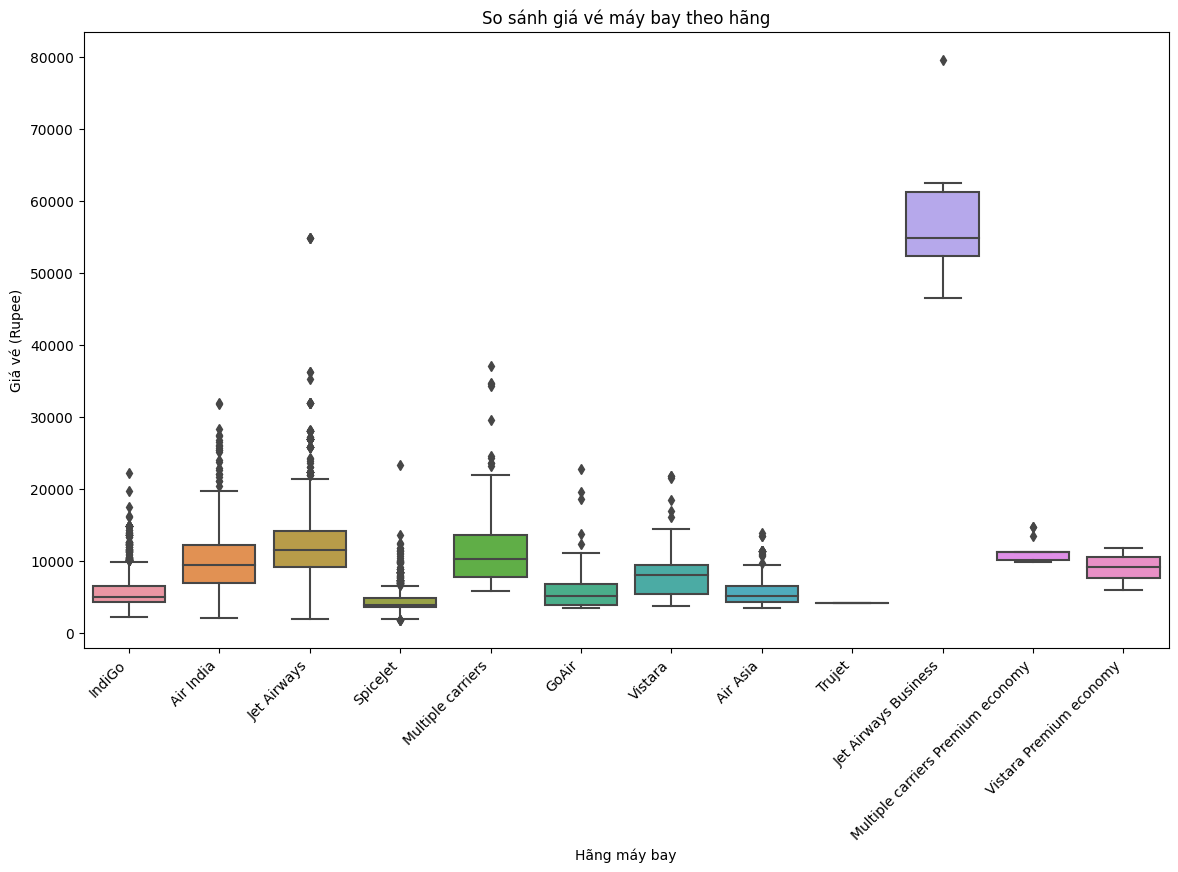

In [117]:
# Vẽ đồ thị so sánh giá vé theo hãng máy bay
plt.figure(figsize=(14, 8))
sns.boxplot(x='Airline', y='Price', data=merged_data)
plt.title('So sánh giá vé máy bay theo hãng')
plt.xlabel('Hãng máy bay')
plt.ylabel('Giá vé (Rupee)')
plt.xticks(rotation=45, ha='right')  # Để xác định định dạng các nhãn trên trục x
plt.show()


##2. So sánh tỷ lệ các chuyến bay thẳng và trung chuyển (có dừng)


##3. Nước nào có lượng chuyến bay nhiều nhất?


##4. Hãng máy bay nào được khách đặt vé nhiều/thấp nhất?


##5. Tháng nào là tháng cao điểm


##6. Giá có thay đổi tùy theo hãng hàng không hay không?


##7. Giá vé bị ảnh hưởng như thế nào khi mua vé chỉ 1 hoặc 2 ngày trước ngày khởi hành?


##8. Giá vé có thay đổi theo thời gian đi và đến không?


##9. Giá thay đổi như thế nào khi thay đổi Nguồn và Điểm đến?

#Kết luận các điểm chính quan sát được từ dữ liệu từ các gợi ý trên


#Ngoài các đặc trưng trong tập dữ liệu, các yếu tố nào có khả năng ảnh hưởng đến giá vé chuyến bay?



#Dự đoán giá vé